In [16]:
from pathlib import Path
import sys

sys.path.insert(0, str(Path.cwd().parent))
from util.py3 import from_xyz_block

xyz_file = Path("/home/tns97255/C5O-Kinetics/calc/9/40461350/calc.020.xyz")
from_xyz_block(xyz_file.read_text())


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

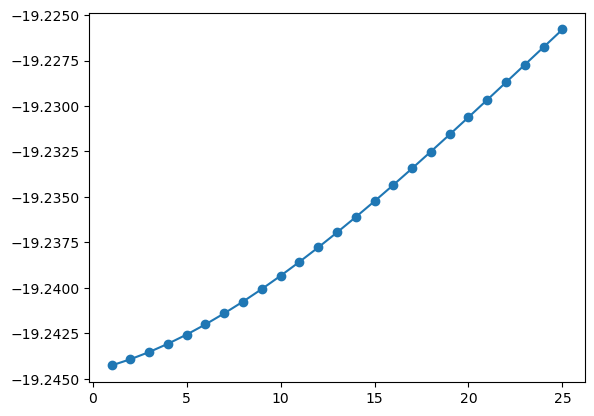

23

In [1]:

import numpy as np
import matplotlib.pyplot as plt


# energies = [-19.23906320112, -19.23840872989, -19.23771229769, -19.23697793433, -19.23620277628, -19.23539332107, -19.23454979561, -19.23367832729, -19.23278578138, -19.23187923448, -19.23097037002, -19.23007398287, -19.22920963915, -19.22840338587, -19.22768973506, -19.22711417423, -19.22674155344, -19.22672468109, -19.22740137381, -19.23032745866, -19.23494980075, -19.23921634608, -19.24299368085, -19.24612889033, -19.24843916281]
energies = [-19.24427284264, -19.24393120284, -19.24353534714, -19.24307891097, -19.24257174966, -19.2420120986, -19.24140488568, -19.2407571369, -19.24006610596, -19.23933718475, -19.23857390038, -19.23777920384, -19.23695582265, -19.23610646315, -19.23523383094, -19.23434059792, -19.23342938299, -19.23250274313, -19.23156317377, -19.23061310872, -19.22965492588, -19.22869094932, -19.22772345161, -19.22675466131, -19.22578676369]
steps = [i for i in range(1, len(energies) + 1)]

plt.plot(steps, energies, marker="o")
plt.show()

# Detect sudden drops in energy (proton transfer)
energy_diffs = np.diff(energies)
sudden_drop_indices = np.where(energy_diffs < -0.005)[0]
if len(sudden_drop_indices) > 0:
    # Pick the step just before the drop
    drop_idx = sudden_drop_indices[0]
    ts_idx = drop_idx
else:
    # Identify critical points
    first_derivative = np.gradient(energies)
    second_derivative = np.gradient(first_derivative)
    first_signs = np.sign(first_derivative)
    cp_indices = np.where(np.diff(first_signs) < 0)[0]
    if len(cp_indices):
        # Second derivative test
        if second_derivative[cp_indices[0]] < 0:
            ts_idx = cp_indices[0]
        else:
            raise ValueError("Identified local minima of energy.")
    else:
        # Identify inflections from second derivative
        second_signs = np.sign(second_derivative)
        flip_indices = np.where(np.diff(second_signs) < 0)[0]
        if len(flip_indices):
            ts_idx = flip_indices[0]
        else:
            ts_idx = np.argmax(energies)  # Fallback clause

selected_step = steps[ts_idx]
selected_step